In [ ]:
'''For finalized notebook walkthrough'''

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
stations = pd.read_csv('../data/station_data.csv')
trips = pd.read_csv('../data/trip_data.csv',
                    parse_dates=['Start Date', 'End Date'], 
                    infer_datetime_format=True)
weather = pd.read_csv('../data/weather_data.csv')

In [3]:
'''
A note included with the data indicates that several stations were
relocated. Those include stations 23, 24, 49, 69 and 72, which
became 85, 86, 87, 88 and 89, respectively. Subsequently, 89 later
became 90, as well.
'''
moved_stations=[23, 24, 49, 69, 72]
new_stations1=[85, 86, 87, 88, 89]
new_stations2=[90]

In [4]:
replace_zip = list(zip(moved_stations, new_stations1))

for s1, s2 in replace_zip:
    trips.loc[trips["Start Station"]==s1, "Start Station"]=s2

trips.loc[trips["Start Station"]==89, "Start Station"]=90

for s1, s2 in replace_zip:
    trips.loc[trips["End Station"]==s1, "End Station"]=s2
    
trips.loc[trips["End Station"]==89, "End Station"]=90

In [5]:
trips['month'] = trips['Start Date'].dt.month
trips['day'] = trips['Start Date'].dt.dayofweek
trips['hour'] = trips['Start Date'].dt.hour

In [6]:
weekdays=trips[trips["Start Date"].dt.weekday <5]
weekends=trips[trips["Start Date"].dt.weekday >=5]

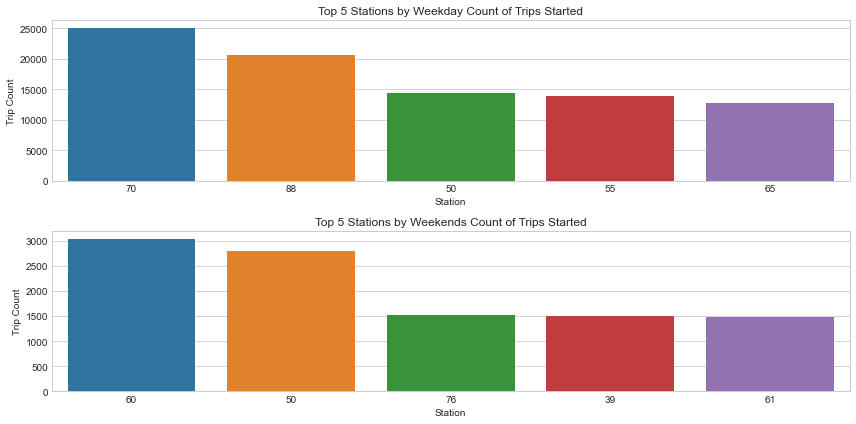

In [7]:
fig, ax=plt.subplots(2, 1,  figsize=(12, 6))

sns.countplot(x=weekdays["Start Station"],
              order= weekdays['Start Station'].value_counts().index[:5],
              ax=ax[0])
ax[0].set_title("Top 5 Stations by Weekday Count of Trips Started")
ax[0].set_xlabel('Station')
ax[0].set_ylabel('Trip Count')

sns.countplot(x=weekends["Start Station"],
              order= weekends['Start Station'].value_counts().index[:5],
              ax=ax[1])
ax[1].set_title("Top 5 Stations by Weekends Count of Trips Started")
ax[1].set_xlabel('Station')
ax[1].set_ylabel('Trip Count')

fig.tight_layout();

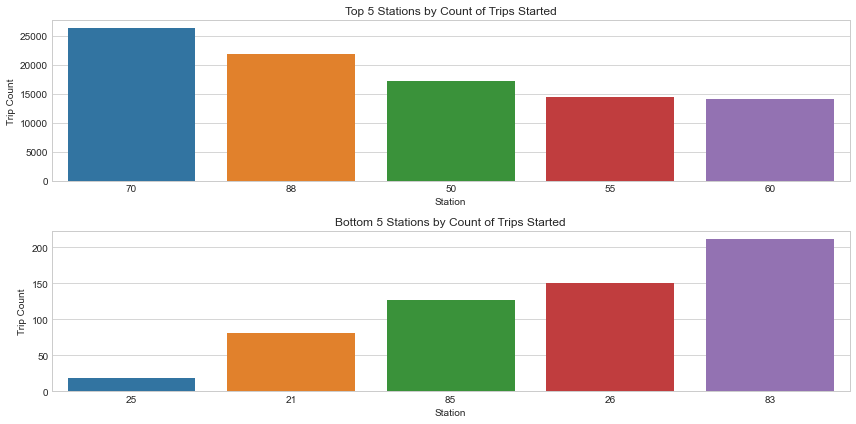

In [8]:
fig, ax=plt.subplots(2, 1,  figsize=(12, 6))

sns.countplot(x=trips["Start Station"],
              order= trips['Start Station'].value_counts().index[:5],
              ax=ax[0])
ax[0].set_title("Top 5 Stations by Count of Trips Started")
ax[0].set_xlabel('Station')
ax[0].set_ylabel('Trip Count')

sns.countplot(x=trips["Start Station"],
              order= trips['Start Station'].value_counts(ascending=True).index[:5],
              ax=ax[1])
ax[1].set_title("Bottom 5 Stations by Count of Trips Started")
ax[1].set_xlabel('Station')
ax[1].set_ylabel('Trip Count')

fig.tight_layout();

In [13]:
def make_groupbars(df, incr, title, xticklabels, xlabel):
    tdf = df.groupby([incr, 'Start Station']).size().reset_index(name='counts')
    tdfsrt = tdf.sort_values(['counts'], ascending=False)

    t5df = pd.DataFrame(columns=[incr, 'Start Station', 'counts'])
    for i in range(df[incr].max()+1):
        t5df = t5df.append(tdfsrt[tdfsrt[incr]==i][:5])

    fig, ax = plt.subplots(figsize=(12, 6))    
    sortedgroupedbar(ax, incr,'counts', "Start Station", xlabel, data=t5df)
    ax.set_title(title)
    ax.set_xticklabels(xticklabels)

    fig.tight_layout()
    plt.show()

def sortedgroupedbar(ax, x,y, groupby, xlabel, data=None, width=0.8, **kwargs):
    order = np.zeros(len(data))
    df = data.copy()
    for xi in np.unique(df[x].values):
        group = data[df[x] == xi]
        a = group[y].values
        b = sorted(np.arange(len(a)),key=lambda x:a[x],reverse=True)
        c = sorted(np.arange(len(a)),key=lambda x:b[x])
        order[data[x] == xi] = c   
    df["order"] = order
    u, df["ind"] = np.unique(df[x].values, return_inverse=True)
    step = width/len(np.unique(df[groupby].values))
    for xi,grp in df.groupby(groupby):
        ax.bar(grp["ind"]-width/2.+grp["order"]*step+step/2.,
               grp[y],width=step, label=xi, **kwargs)
    ax.legend(title=groupby)
    ax.set_xticks(np.arange(len(u)))

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Trip Count')

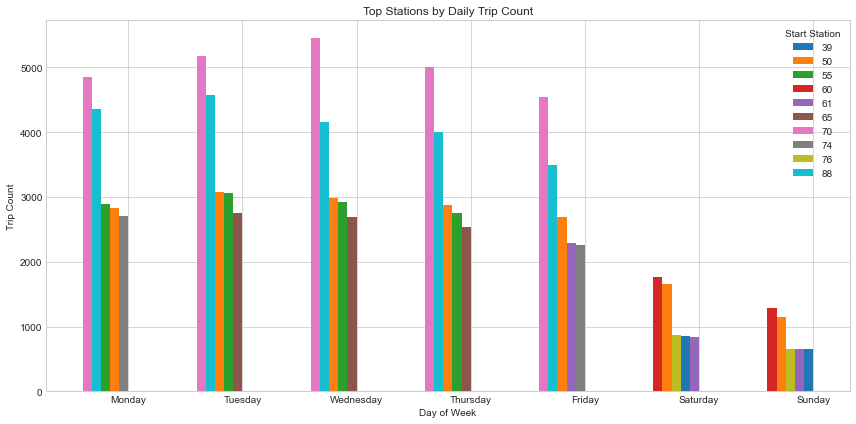

In [16]:
make_groupbars(trips,
               'day',
               'Top Stations by Daily Trip Count',
               ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
               'Day of Week')

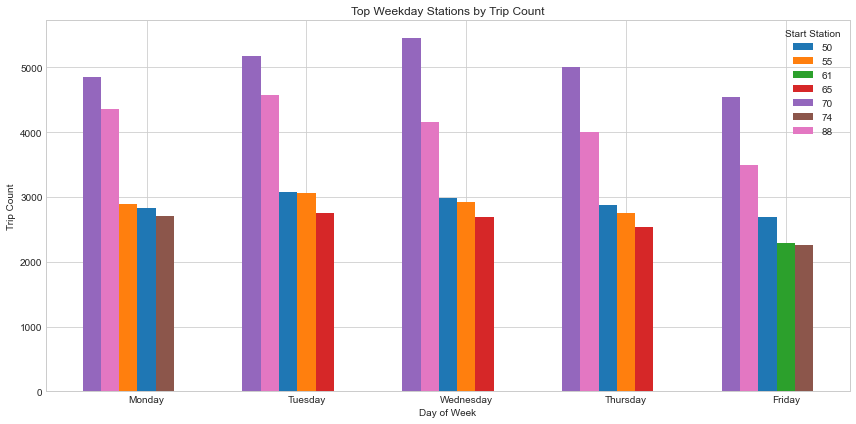

In [14]:
make_groupbars(weekdays,
               'day',
               'Top Weekday Stations by Trip Count',
               ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
               'Day of Week')

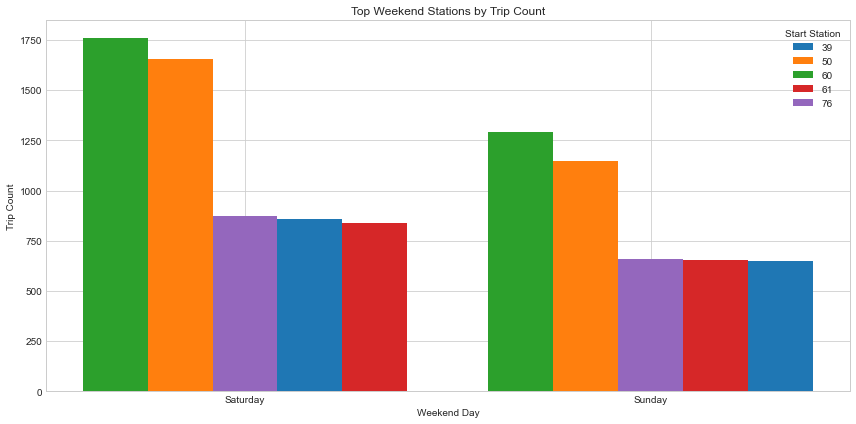

In [15]:
make_groupbars(weekends,
               'day',
               'Top Weekend Stations by Trip Count',
               ['Saturday', 'Sunday'],
               'Weekend Day')

In [20]:
months = []
for i in range(trips.month.max()):
    months.append(f'{i+1}')

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

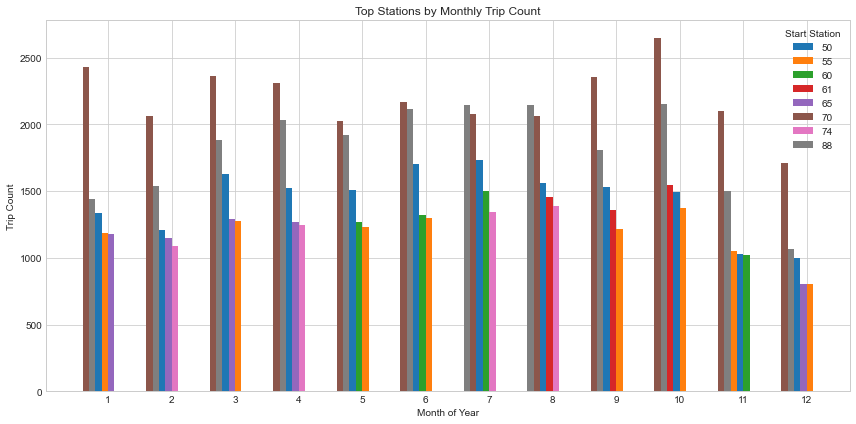

In [21]:
make_groupbars(trips,
               'month',
               'Top Stations by Monthly Trip Count',
               months,
               'Month of Year')